# Regression

## problem definition
- predict if a person will suffer with hearing disease

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

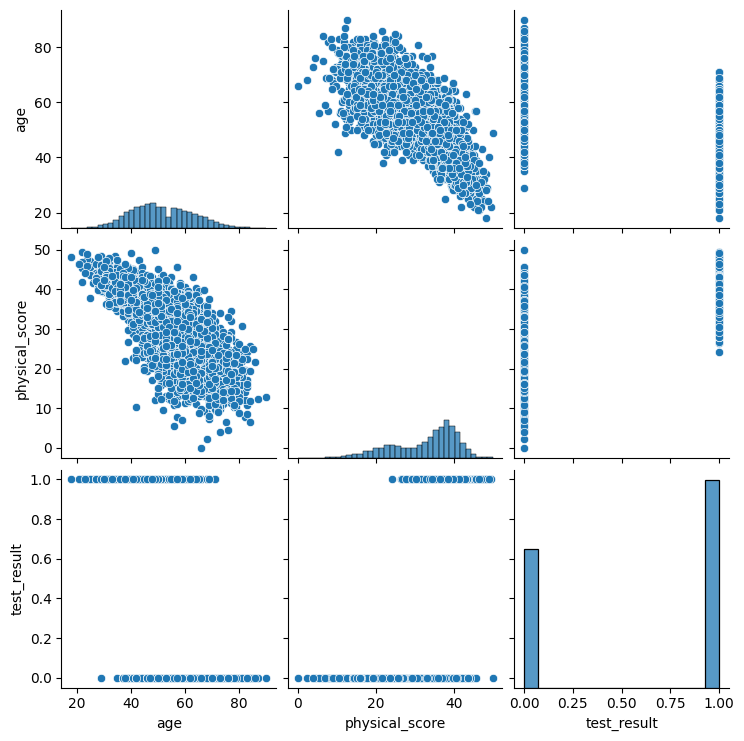

In [6]:
sns.pairplot(df)

In [7]:
df.cov()

,age,physical_score,test_result
age,127.396398,-72.123723,-3.777956
physical_score,-72.123723,66.745660,3.173059
test_result,-3.777956,3.173059,0.240048


In [8]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


### Pre-processing

In [9]:
# split the data into x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [10]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [31]:
y_test.size

1500

### train the model

In [11]:
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### evaluate the model

In [12]:
y_pred = model.predict(x_test)
y_true = y_test

In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
mae

0.23169873456688636

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
mse

0.08815786676008569

In [15]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

0.2969139046257108

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.6294330947453313

### prediction

In [17]:
y_pred = model.predict(x_test)
y_pred

array([0.85372289, 0.72662774, 0.7889569 , ..., 0.84281843, 0.83703581,
       0.25120868])

In [29]:
# converting the discrete values to categorical
# we will consider the class value as 1 if the y_pred is >= 0.5 or 0 otherwise
# y_pred = 1 if y_pred >= 0.5 else 0
predictions = []
for value in y_pred:
    if value >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
predictions = np.array(predictions)

In [28]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [24]:
flag = False

if flag == True:
    print("Yes")
else:
    print("No")

No


In [25]:
# this is a replacement for ternary operator 
# limitation
# - block of statements is not allowed in if or else case
# - this is not a broadcase operation

# flag == True ? print("yes") : print("no")
print("Yes" if flag == True else "No")

No


### evaluation of classification model

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predictions)
cm

array([[478, 107],
       [ 25, 890]])

In [32]:
cm[0][0]

478

In [33]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
accuracy

0.912